In [1]:
# Import libraries to be used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
titanic_df = pd.read_csv('./data/Titanic-Dataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

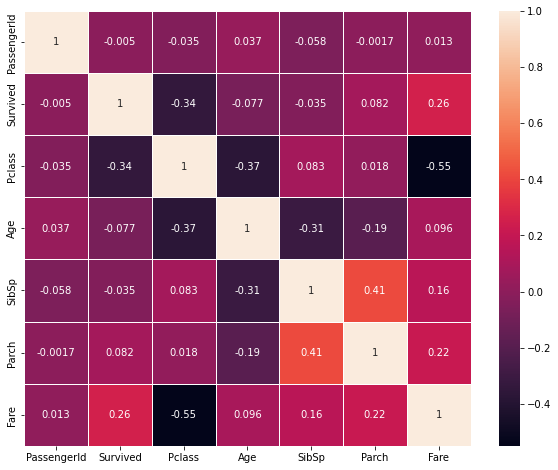

In [4]:
plt.figure(figsize=(10,8)) 
sns.heatmap(titanic_df.corr(), annot=True, linewidths=.5) 

In [5]:
# Look at which columns have NaN values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Replace NaN values with average age for 'Age' column
mean_age = titanic_df['Age'].mean()
mean_age = round(mean_age, 0)

titanic_df['Age'] = titanic_df['Age'].fillna(mean_age)

In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Drop Cabin column
titanic_df.drop(['PassengerId', 'Cabin', 'Name', 'Parch', 'Ticket', 'Fare'], axis=1, inplace=True)

In [9]:
# Rename columns
titanic_df.rename(columns={'Pclass': 'Class', 'Embarked': 'Entrance'})

,Survived,Class,Sex,Age,SibSp,Entrance
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,30.0,1,S
889,1,1,male,26.0,0,C


In [10]:
# Fill missing values in embarked column by imputing the mode
titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0], inplace=True)


In [11]:
# Look at which columns have NaN values
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Embarked    0
dtype: int64

In [12]:
# Get columns that are of type 'object' 
sel_cols = list(titanic_df.select_dtypes(include='object'))
sel_cols

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for column in sel_cols:
    titanic_df[column] = label.fit_transform(titanic_df[column])


titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,1,22.0,1,2
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,2
3,1,1,0,35.0,1,2
4,0,3,1,35.0,0,2


In [13]:
# Get feature/target values
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)


LogisticRegression()

In [14]:
# Get predicted values
y_pred = log.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [15]:
from sklearn.metrics import r2_score, confusion_matrix
r2_score(y_test, y_pred)

0.1936936936936937

In [16]:
log.score(X_test, y_test)

0.8044692737430168

In [17]:
confusion_matrix(y_test, y_pred)

array([[88, 17],
       [18, 56]], dtype=int64)